# Laboratorio de Tensión: Cálculo de Resultados
Universidad de los Andes <br>
Departamento de Ingeniería Mecánica <br>
IMEC 1410 - Ciencia de Materiales <br>
Sebastián Villota Parra <br>

# Prueba 1: Acero 1013

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from intersect import intersection
from scipy.interpolate import splrep, PchipInterpolator
import matplotlib.pyplot as plt 

In [124]:
archivo_excel = "datos_acero.xlsx"  
df = pd.read_excel(archivo_excel)

desplazamiento = df["Desplazamiento [mm]"].to_numpy()
fuerza = df["Fuerza [N]"].to_numpy()

area_inicial = ((np.pi) * 0.25 * 12.93**2)
longitud_inicial = 50.08
area_final = ((np.pi) * 0.25 * 8.2**2)
longitud_final = 69.0

esfuerzo = np.array([(i / area_inicial) for i in fuerza])
deformacion = np.array([((i)/longitud_inicial) for i in desplazamiento])

print("Datos de esfuerzo [MPa]: ", esfuerzo)
print("Datos de deformacion [mm/mm]: ", deformacion)


Datos de esfuerzo [MPa]:  [-2.29893348e-01 -2.27231489e-01  6.46138326e-02 ...  3.37089462e+02
  3.33770212e+02  2.00382655e+02]
Datos de deformacion [mm/mm]:  [1.39776358e-06 1.99680511e-06 3.19488818e-06 ... 4.01039337e-01
 4.01073083e-01 4.01110224e-01]


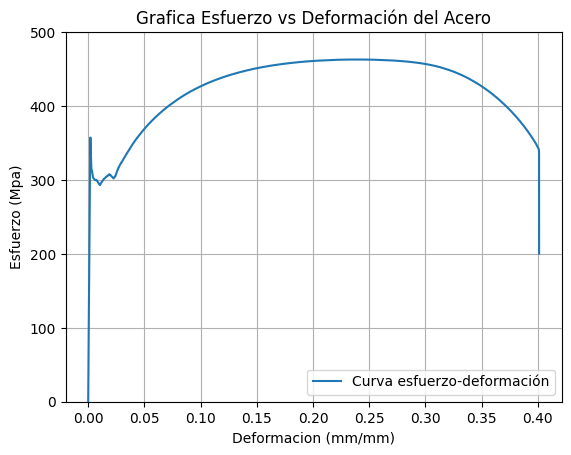

In [107]:
#a. plotear curva esfuerzo deformacion

plt.plot(deformacion, esfuerzo, label="Curva esfuerzo-deformación")

plt.xlabel("Deformacion (mm/mm)")
plt.ylabel("Esfuerzo (Mpa)")  
plt.title('Grafica Esfuerzo vs Deformación del Acero')
plt.legend(loc="lower right")
plt.grid(True)

ax = plt.gca()
ax.set_ylim([0, 500])

plt.show()


El UYS es 357.41 MPa cuando la deformación es 0.0019 mm/mm
El LYS es 293.06 MPa cuando la deformación es 0.0019 mm/mm


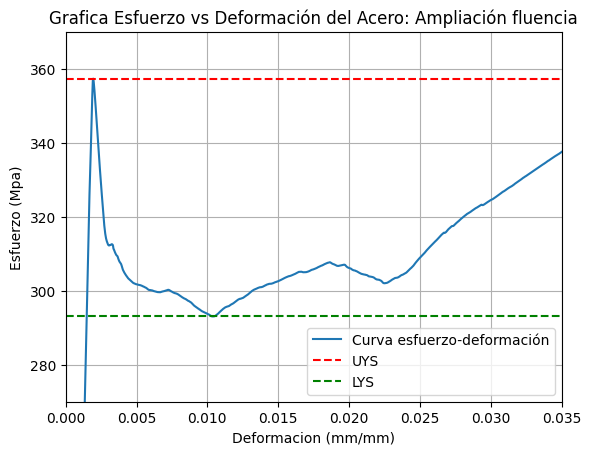

In [108]:
plt.plot(deformacion, esfuerzo, label="Curva esfuerzo-deformación")

#máximo dentro de la ampliación
ampliacion_indices = np.where((deformacion >= 0) & (deformacion <= 0.02))
esfuerzo_ampliacion = esfuerzo[ampliacion_indices]
deformacion_ampliacion = deformacion[ampliacion_indices]
max_esfuerzo_index = np.argmax(esfuerzo_ampliacion)
uys = esfuerzo_ampliacion[max_esfuerzo_index]
max_deformacion_ampliacion = deformacion_ampliacion[max_esfuerzo_index]

# mínimo dentro de la ampliación
rango_minimo_indices = np.where((deformacion >= 0.005) & (deformacion <= 0.02))
esfuerzo_rango_minimo = esfuerzo[rango_minimo_indices]
deformacion_rango_minimo = deformacion[rango_minimo_indices]
min_esfuerzo_index = np.argmin(esfuerzo_rango_minimo)
lys = esfuerzo_rango_minimo[min_esfuerzo_index]
min_deformacion_rango_minimo = deformacion_rango_minimo[min_esfuerzo_index]

print(f"El UYS es {round(uys, 2)} MPa "
      f"cuando la deformación es {round(max_deformacion_ampliacion, 4)} mm/mm")
print(f"El LYS es {round(lys, 2)} MPa "
      f"cuando la deformación es {round(max_deformacion_ampliacion, 4)} mm/mm")

plt.axhline(y=uys, color='r', linestyle='--', label='UYS')
plt.axhline(y=lys, color='g', linestyle='--', label='LYS')

plt.axis([0 , 0.035, 270, 370])
plt.xlabel("Deformacion (mm/mm)")
plt.ylabel("Esfuerzo (Mpa)")  
plt.title('Grafica Esfuerzo vs Deformación del Acero: Ampliación fluencia')
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

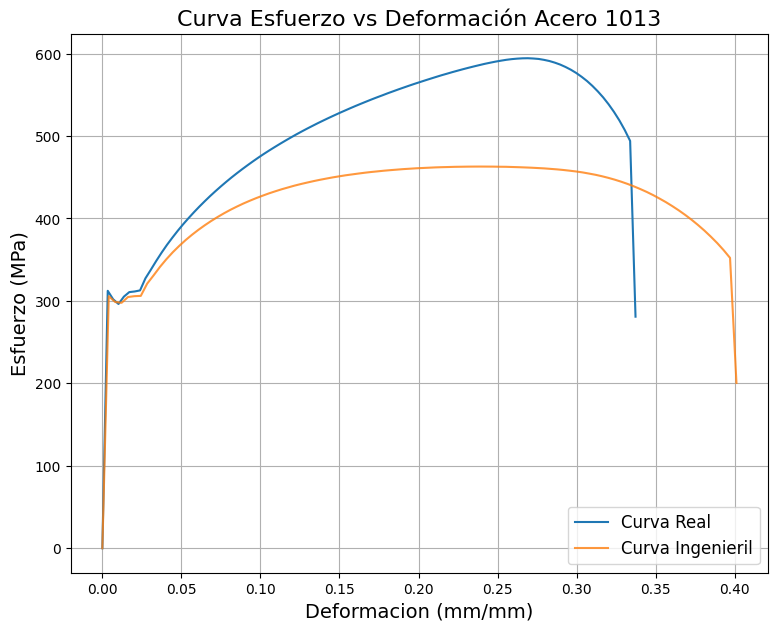

In [109]:
#gráfica real

deformacion_real = np.log(1 + deformacion)
esfuerzo_real = esfuerzo * (1 + deformacion)

plt.figure(figsize=(9, 7))
plt.plot(deformacion_suave_real, esfuerzo_suave_real, label="Curva Real")
plt.plot(deformacion_suave, esfuerzo_suave, label="Curva Ingenieril", alpha=0.8)


plt.xlabel("Deformacion (mm/mm)", fontsize=14)
plt.ylabel("Esfuerzo (MPa)", fontsize=14)
plt.title('Curva Esfuerzo vs Deformación Acero 1013', fontsize=16)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=12)
plt.grid(True)

plt.show()

In [135]:
#c. Modulo de young (usando datos cada 5, hasta el 150)
indices = [5*i for i in range(1,30)]
esfuerzos_my = [esfuerzo[i] for i in indices]
deformaciones_my = [deformacion[i] for i in indices]
modulos = [esfuerzos_my[i] / deformaciones_my[i] for i in range(len(esfuerzos_my))]
E = np.average(modulos)
incertidumbre_E = np.std(modulos)

print(modulos)
print(f"El módulo de Young es: {E/1000} GPa, y su incertidumbre es {incertidumbre_E/1000}GPa")

#d. Elasticidad.
#print(f"Por esto, su elasticidad es {x_yield[0]} mm/mm, o {x_yield[0]*100}%")

#e. Resiliencia
#resiliencia = 0.5*x_yield[0]*y_yield[0]
#print(f"El módulo de resiliencia es aproximadamente {resiliencia}")

#f. Ductilidad en area
duct_area = (area_inicial - area_final)/area_inicial
print(f"La ductilidad en área es {duct_area*100}%")

#g. Ductilidad en elongación
duct_elong = (longitud_final - longitud_inicial)/longitud_inicial
print(f"La ductilidad en elongación es {duct_elong*100}%")

#h. Esfuerzo de fractura real y de ingeniería
e_frac = esfuerzo[-1]
e_frac_ing = fuerza[-1]/area_final
print(f"El esfuerzo de fractura real es {e_frac_ing}MPa, mientras que el de ingeniería es {e_frac}MPa")

#i. Módulo de tenacidad. 
area = np.trapz(esfuerzo,deformacion)
print(f"El módulo de tenacidad es {area}")
#c. Esfuerzo máximo de tensión ingenieril
s_ult_norma = max(fuerza) / area_inicial
s_ult_index = np.argmax(esfuerzo)
def_ult = deformacion[s_ult_index]
s_ult = esfuerzo[s_ult_index]

print(f"El esfuerzo máximo de tensión ingenieril es: {s_ult_norma}MPa ")

resiliencia = 0.5*uys*deformacion[266]
print("La resiliencia es:", resiliencia)

[188469.49959934468, 195577.48285861014, 200650.52515346365, 200253.66439950722, 200286.5056754495, 201857.41956935814, 201393.4723483778, 200789.93047882017, 201734.71550526234, 201328.98198819053, 202074.95901097215, 201701.6967872681, 202233.82634524137, 201980.77641612658, 201778.7858326816, 202043.814936032, 201929.21346130516, 202106.003076524, 202402.88824332049, 202170.35994470638, 202143.5163375568, 201574.16581315116, 201618.50171843072, 201678.00942898192, 201463.29135484365, 201411.20471458876, 201620.20997944055, 201331.8289913362, 201178.7296850704]
El módulo de Young es: 200.92358550530898 GPa, y su incertidumbre es 2.650054618576805GPa
La ductilidad en área es 59.78105678204192%
La ductilidad en elongación es 37.77955271565496%
El esfuerzo de fractura real es 498.22953876149353MPa, mientras que el de ingeniería es 200.3826552895795MPa
El módulo de tenacidad es 169.28678492323726
El esfuerzo máximo de tensión ingenieril es: 462.9785768927427MPa 
La resiliencia es: 0.3476

In [132]:
esfuerzo[266]

357.4132098200636

# Prueba 2: Aluminio 6063

In [137]:
archivo_excel = "datos_aluminio_300.xlsx"  
df = pd.read_excel(archivo_excel)

desplazamiento = df["Desplazamiento [mm]"].to_numpy()
fuerza = df["Fuerza [N]"].to_numpy()

area_inicial = ((np.pi) * 0.25 * 9.06**2)
longitud_inicial = 21.2
area_final = ((np.pi) * 0.25 * 4.9**2)
longitud_final = 38.7

esfuerzo = np.array([(i / area_inicial) for i in fuerza])
deformacion = np.array([((i)/longitud_inicial) for i in desplazamiento])

print("Datos de esfuerzo [MPa]: ", esfuerzo)
print("Datos de deformacion [mm/mm]: ", deformacion)

Datos de esfuerzo [MPa]:  [-5.39489878e-03 -3.35358573e-03  4.08790001e-02 ...  5.07839754e+00
  5.07717678e+00  5.07638880e+00]
Datos de deformacion [mm/mm]:  [0.00000000e+00 1.41509434e-05 5.66037736e-05 ... 8.77372642e-01
 8.77448113e-01 8.77490566e-01]


[910.3576321402627, 907.0937872205592, 904.2705885248266, 901.1954186948504, 898.3266750075558, 895.3987938935358, 892.3914111440247, 889.9054562238396, 886.9742178913774, 884.7133905592906, 882.0715726474755, 879.3654876726004, 876.4159229146367, 874.1605272556453, 871.9144255259328, 869.8134543645953, 867.6403935435599, 865.2071450616788, 863.0934428336702, 860.9806932866801]
El módulo de Young es: 0.8840645218203299 GPa, y su incertidumbre es 0.014998342943288683GPa
La ductilidad en área es 70.74933360622583%
La ductilidad en elongación es 82.54716981132077%
El esfuerzo de fractura real es 17.354779987305566MPa, mientras que el de ingeniería es 5.076388797460233MPa
El módulo de tenacidad es 58.47719963700976


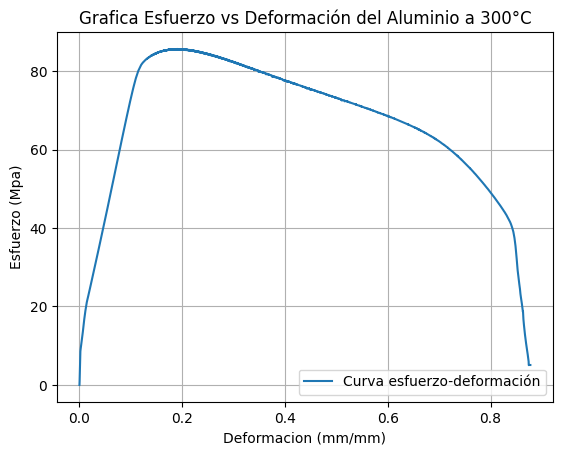

El esfuerzo máximo de tensión ingenieril es: 85.70714220212287MPa 


In [112]:
#a. plotear curva esfuerzo deformacion

plt.plot(deformacion, esfuerzo, label="Curva esfuerzo-deformación")

#c. Modulo de young (usando datos cada 5, desde el 125 hasta el 175)
indices = [5*i for i in range(100,120)]
esfuerzos_my = [esfuerzo[i] for i in indices]
deformaciones_my = [deformacion[i] for i in indices]
modulos = [esfuerzos_my[i] / deformaciones_my[i] for i in range(len(esfuerzos_my))]
E = np.average(modulos)
incertidumbre_E = np.std(modulos)

print(modulos)
print(f"El módulo de Young es: {E/1000} GPa, y su incertidumbre es {incertidumbre_E/1000}GPa")

#d. Elasticidad.
#print(f"Por esto, su elasticidad es {x_yield[0]} mm/mm, o {x_yield[0]*100}%")

#e. Resiliencia
#resiliencia = 0.5*x_yield[0]*y_yield[0]
#print(f"El módulo de resiliencia es aproximadamente {resiliencia}")

#f. Ductilidad en area
duct_area = (area_inicial - area_final)/area_inicial
print(f"La ductilidad en área es {duct_area*100}%")

#g. Ductilidad en elongación
duct_elong = (longitud_final - longitud_inicial)/longitud_inicial
print(f"La ductilidad en elongación es {duct_elong*100}%")

#h. Esfuerzo de fractura real y de ingeniería
e_frac = esfuerzo[-1]
e_frac_ing = fuerza[-1]/area_final
print(f"El esfuerzo de fractura real es {e_frac_ing}MPa, mientras que el de ingeniería es {e_frac}MPa")

#i. Módulo de tenacidad. 
area = np.trapz(esfuerzo,deformacion)
print(f"El módulo de tenacidad es {area}")

plt.xlabel("Deformacion (mm/mm)")
plt.ylabel("Esfuerzo (Mpa)")  
plt.title('Grafica Esfuerzo vs Deformación del Aluminio a 300°C')
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

#c. Esfuerzo máximo de tensión ingenieril
s_ult_norma = max(fuerza) / area_inicial
s_ult_index = np.argmax(esfuerzo)
def_ult = deformacion[s_ult_index]
s_ult = esfuerzo[s_ult_index]

print(f"El esfuerzo máximo de tensión ingenieril es: {s_ult_norma}MPa ")

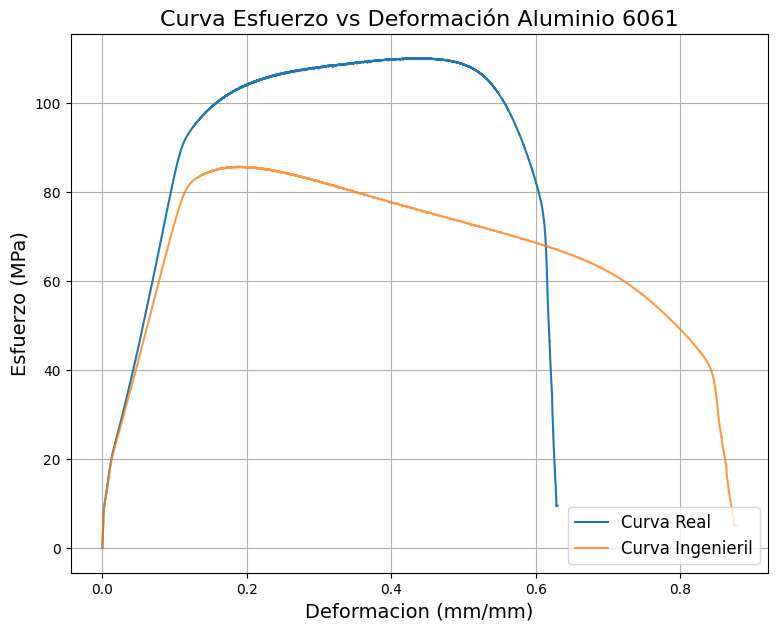

In [122]:
#gráfica real

deformacion_real = np.log(1 + deformacion)
esfuerzo_real = esfuerzo * (1 + deformacion)

plt.figure(figsize=(9, 7))
plt.plot(deformacion_real, esfuerzo_real, label="Curva Real")
plt.plot(deformacion, esfuerzo, label="Curva Ingenieril", alpha=0.8)


plt.xlabel("Deformacion (mm/mm)", fontsize=14)
plt.ylabel("Esfuerzo (MPa)", fontsize=14)
plt.title('Curva Esfuerzo vs Deformación Aluminio 6061', fontsize=16)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=12)
plt.grid(True)

plt.show()

In [121]:
#c. Modulo de young (usando datos cada 5, desde el 125 hasta el 175)
indices = [5*i for i in range(450,600)]
esfuerzos_my = [esfuerzo[i] for i in indices]
deformaciones_my = [deformacion[i] for i in indices]
modulos = [esfuerzos_my[i] / deformaciones_my[i] for i in range(len(esfuerzos_my))]
E = np.average(modulos)
incertidumbre_E = np.std(modulos)

print(E)
print(modulos)
print(deformacion[500])
print(esfuerzo[500])

417.15538053088244
[483.56188455425246, 482.57158845710927, 481.46782730609124, 480.2135193647964, 479.5040681498334, 478.3612186959496, 477.470671507014, 476.41379890454056, 475.4199176605134, 474.5575431285778, 473.3663063133421, 472.1749705917506, 471.5838450386793, 470.1675070507708, 469.0926116955189, 468.172917194611, 467.2322263769426, 466.08914840256824, 465.0197419839638, 464.57243657670614, 463.156033380798, 462.58721416298465, 461.2972890560038, 460.82044802522876, 459.4601861363077, 458.7123170819409, 457.31366644913646, 456.40765241979943, 455.6591878156274, 454.49394349126936, 454.02716106476794, 452.7050023938769, 451.9233884202685, 450.9457087969994, 449.89678835202653, 449.3571535930363, 448.46653829498507, 447.28450984429657, 446.5038238097575, 445.3134665311175, 444.5378423933065, 443.4459174260825, 442.5480170269459, 441.6857872834032, 440.527029024431, 439.8701960593367, 439.10686926747076, 438.3966729755199, 437.1627324331073, 436.0760632701822, 435.5021569010161,

In [144]:
s_yield = 82
resiliencia = 0.5*s_yield*deformacion[1600]
print(resiliencia)

5.157490566037735


# Prueba 3 y 4:

In [154]:
archivo_excel = "datos_polimeros.xlsx"

# Para abrir la hoja "prueba3"
df_prueba3 = pd.read_excel(archivo_excel, sheet_name="prueba3")
desplazamiento_prueba3 = df_prueba3["Desplazamiento (mm)"].to_numpy()
fuerza_prueba3 = df_prueba3["Carga (N)"].to_numpy()

# Para abrir la hoja "prueba4"
df_prueba4 = pd.read_excel(archivo_excel, sheet_name="prueba4")
desplazamiento_prueba4 = df_prueba4["Desplazamiento (mm)"].to_numpy()
fuerza_prueba4 = df_prueba4["Carga (N)"].to_numpy()

area_inicial3 = (6.02*2.7)
area_inicial4 = (5.98*2.6)

esfuerzo_p3 = np.array([(i / area_inicial3) for i in fuerza_prueba3])
deformacion_p3 = np.array([((i)/longitud_inicial) for i in desplazamiento_prueba3])

print("Datos de esfuerzo [MPa]: ", esfuerzo_p3)
print("Datos de deformacion [mm/mm]: ", deformacion_p3)

esfuerzo_p4 = np.array([(i / area_inicial) for i in fuerza_prueba4])
deformacion_p4 = np.array([((i)/longitud_inicial) for i in desplazamiento_prueba4])

print("Datos de esfuerzo [MPa]: ", esfuerzo_p4)
print("Datos de deformacion [mm/mm]: ", deformacion_p4)

Datos de esfuerzo [MPa]:  [0.13152455 0.13152455 2.52815307 ... 7.16066814 3.17115172 3.17115172]
Datos de deformacion [mm/mm]:  [0.0000000e+00 0.0000000e+00 8.9456869e-04 ... 3.6387520e+00 3.6412500e+00
 3.6412500e+00]
Datos de esfuerzo [MPa]:  [ 2.71813092  2.71813092 10.14184816 10.14184816 10.14184816 15.69502276
 15.69502276 19.6114741  19.6114741  19.6114741  22.32960502 22.32960502
 24.22937123 24.22937123 25.51537468 25.51537468 25.51537468 26.36296296
 26.36296296 26.889055   26.889055   26.889055   27.16670973 27.16670973
 27.28362249 27.28362249 27.28362249 27.28362249 27.28362249 27.21055125
 27.12286822 27.12286822 27.12286822 26.83059555 26.83059555 26.5675526
 26.5675526  26.5675526  26.26066814 26.26066814 25.88071244 25.88071244
 25.39846192 25.39846192 25.39846192 24.69700997 24.69700997 23.6886674
 23.6886674  23.6886674  22.41728805 22.41728805 20.99976621 20.99976621
 19.2315184  19.2315184  19.2315184  17.06870309 17.06870309 15.60733973
 15.60733973 15.60733973 1

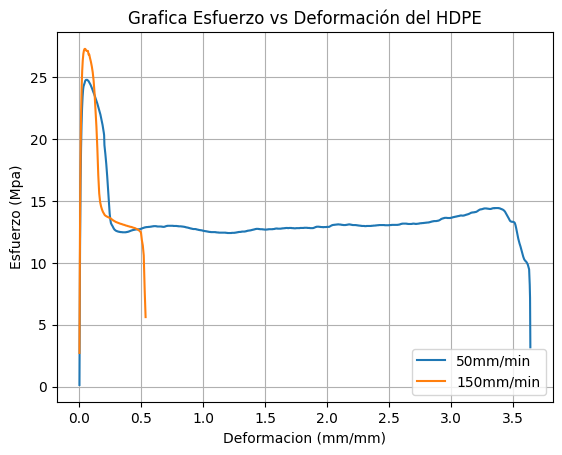

In [155]:
#a. plotear curva esfuerzo deformacion

plt.plot(deformacion_p3, esfuerzo_p3, label="50mm/min")
plt.plot(deformacion_p4, esfuerzo_p4, label="150mm/min")

plt.xlabel("Deformacion (mm/mm)")
plt.ylabel("Esfuerzo (Mpa)")  
plt.title('Grafica Esfuerzo vs Deformación del HDPE')
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

In [159]:
#c. Modulo de young (usando datos cada 2, hasta el 10)
indices_p3 = [2*i for i in range(1,10)]
esfuerzos_my_p3 = [esfuerzo_p3[i] for i in indices_p3]
deformaciones_my_p3 = [deformacion_p3[i] for i in indices_p3]
modulos_p3 = [esfuerzos_my_p3[i] / deformaciones_my_p3[i] for i in range(len(esfuerzos_my_p3))]
E_p3 = np.average(modulos_p3)
incertidumbre_E_p3 = np.std(modulos_p3)

print(modulos_p3)
print(f"El módulo de Young es: {E_p3/1000} GPa, y su incertidumbre es {incertidumbre_E_p3/1000}GPa")

[2826.113967550844, 2826.113967550844, 2787.6240434180336, 2628.0768969696715, 2458.5571654156925, 2309.9954437299634, 2166.6117302323746, 2166.6117302323746, 2028.168341674465]
El módulo de Young es: 2.4664303651971404 GPa, y su incertidumbre es 0.29522674312450653GPa


In [160]:
#c. Modulo de young (usando datos cada 2, hasta el 10)
indices_p4 = [2*i for i in range(1,10)]
esfuerzos_my_p4 = [esfuerzo_p4[i] for i in indices_p4]
deformaciones_my_p4 = [deformacion_p4[i] for i in indices_p4]
modulos_p4 = [esfuerzos_my_p4[i] / deformaciones_my_p4[i] for i in range(len(esfuerzos_my_p4))]
E_p4 = np.average(modulos_p4)
incertidumbre_E_p4 = np.std(modulos_p4)

print(modulos_p4)
print(f"El módulo de Young es: {E_p3/1000} GPa, y su incertidumbre es {incertidumbre_E_p4/1000}GPa")

[3245.391411344899, 3245.391411344899, 2445.5716863797784, 1962.715073665197, 1614.592289079929, 1352.5882413146544, 1147.4586600433634, 1147.4586600433634, 984.0181748417568]
El módulo de Young es: 2.4664303651971404 GPa, y su incertidumbre es 0.8349509447123394GPa


In [163]:
#c. Esfuerzo máximo de tensión ingenieril
s_ult_norma3 = max(fuerza_prueba3) / area_inicial3
s_ult_index3 = np.argmax(esfuerzo_p3)
def_ult3 = deformacion_p3[s_ult_index3]
s_ult3 = esfuerzo_p3[s_ult_index3]

print(f"El esfuerzo máximo de tensión ingenieril p3 es: {s_ult_norma3}MPa ")

#c. Esfuerzo máximo de tensión ingenieril
s_ult_norma4 = max(fuerza_prueba4) / area_inicial4
s_ult_index4 = np.argmax(esfuerzo_p4)
def_ult4 = deformacion_p4[s_ult_index4]
s_ult4 = esfuerzo_p4[s_ult_index4]

print(f"El esfuerzo máximo de tensión ingenieril p4 es: {s_ult_norma4}MPa ")

El esfuerzo máximo de tensión ingenieril p3 es: 24.784692998646484MPa 
El esfuerzo máximo de tensión ingenieril p4 es: 28.52251093388217MPa 


In [165]:
print(deformacion_p3[-1]*100)
print(deformacion_p4[-1]*100)

364.12500000000006
53.41134185303515


In [166]:
#i. Módulo de tenacidad. 
area3 = np.trapz(esfuerzo_p3,deformacion_p3)
print(f"El módulo de tenacidad p3 es {area3}")

area4 = np.trapz(esfuerzo_p4,deformacion_p4)
print(f"El módulo de tenacidad p4 es {area4}")

El módulo de tenacidad p3 es 49.35153002398697
El módulo de tenacidad p4 es 8.657016721897604
